# A brief review of time series analysis:

Time series analysis is a powerful technique used to analyze and predict data points collected at regular intervals over time. It finds applications in various fields, from finance to climate science and beyond. In this tutorial, we will delve into the fascinating world of time series analysis using the well-known "Air Passengers" dataset.

### Time Series Analysis: A Brief Overview

Time series analysis focuses on understanding and extracting meaningful insights from sequences of data points indexed by time. This method accounts for the temporal dependencies and patterns that exist within the data. It involves techniques to uncover trends, seasonal variations, and other underlying structures in the time series.

Some fundamental components of time series analysis include:

1. **Trend Analysis**: Identifying the long-term trends or patterns in the data. This helps us understand whether the values tend to increase, decrease, or remain relatively stable over time.

2. **Autocorrelation and Lag Analysis**: Exploring the relationship between a data point and its previous values (lags) to detect patterns and dependencies.

3. **Forecasting**: Using historical data to make predictions about future values. This is crucial for decision-making and planning.

### Exploring the "Air Passengers" Dataset

Our dataset, "Air Passengers," records the number of airline passengers each month from 1949 to 1960. By applying time series analysis techniques, we aim to gain insights into passenger trends, identify seasonal patterns, and ultimately forecast future passenger counts.

Additionally, we will leverage machine learning algorithms to build a forecasting model that can provide accurate predictions based on historical data.

---

This introduction provides a concise overview of time series analysis and sets the stage for the tutorial using the "Air Passengers" dataset. It highlights the key components of time series analysis and emphasizes the importance of accurate forecasting.

**Step 1: Import Libraries and Load Data**


In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

import seaborn as sns

# Load the Air Passengers dataset
data = sns.load_dataset('flights')

data.to_csv('AirPassengers.csv', index=False)

# Load the Air Passengers dataset
data = pd.read_csv('AirPassengers.csv')

**Step 2: Data Preprocessing**

In [54]:
# Convert month names to numerical values
month_dict = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

data['month'] = data['month'].map(month_dict)

# Convert the date columns to datetime format
data['date'] = pd.to_datetime(data[['year', 'month']].assign(day=1))

# Set the index to the datetime column
data.set_index('date', inplace=True)

# Drop the original 'year' and 'month' columns if needed
data = data.drop(['year', 'month'], axis=1)


**Step 3: Exploratory Data Analysis (EDA)**

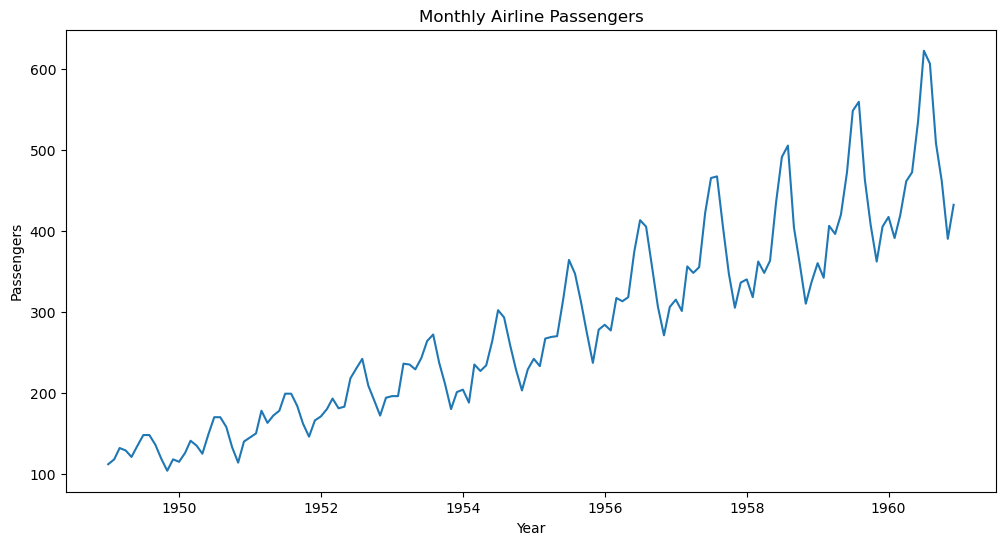

In [55]:
# Visualize the time series data
plt.figure(figsize=(12, 6))
plt.plot(data)
plt.title('Monthly Airline Passengers')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.show()


**Step 4: Feature Engineering**
In time series analysis, a lag feature (or lag variable) is a value from a previous time period. It represents a historical observation of a variable at a specific time in the past. The term "lag" refers to the time gap between the historical observation and the current observation.

Lag features are used to capture temporal patterns and dependencies in time series data. They are particularly important for time series forecasting tasks, where the goal is to predict future values based on historical data.

Here's an example to illustrate lag features:

Let's say we have monthly data on the number of website visitors:

| Month   | Visitors |
| ------- | -------- |
| Jan     | 100      |
| Feb     | 120      |
| Mar     | 110      |
| Apr     | 130      |
| May     | 140      |
| Jun     | 150      |

If we create lag features with a lag of 1, our dataset will look like this:

| Month   | Visitors | Lag_1   |
| ------- | -------- | ------- |
| Jan     | 100      | NaN     |
| Feb     | 120      | 100     |
| Mar     | 110      | 120     |
| Apr     | 130      | 110     |
| May     | 140      | 130     |
| Jun     | 150      | 140     |

In this example, `Lag_1` contains the number of visitors from the previous month. For instance, in February (`Month` = 'Feb'), `Lag_1` is 100, which is the number of visitors in January.

To create `Lag_2`, which represents the value from two months ago, you simply shift the `Visitors` column by two positions to the right. Here's the updated dataset with `Lag_2`:

| Month   | Visitors | Lag_1   | Lag_2   |
| ------- | -------- | ------- | ------- |
| Jan     | 100      | NaN     | NaN     |
| Feb     | 120      | 100     | NaN     |
| Mar     | 110      | 120     | 100     |
| Apr     | 130      | 110     | 120     |
| May     | 140      | 130     | 110     |
| Jun     | 150      | 140     | 130     |

In this table, `Lag_2` contains the number of visitors from two months ago. For example, in March (`Month` = 'Mar'), `Lag_2` is 100, which is the number of visitors in January. Similarly, in April (`Month` = 'Apr'), `Lag_2` is 120, which is the number of visitors in February.


These lag features allow a machine learning model to consider the historical behavior of the time series when making predictions. They are essential for capturing trends, seasonality, and autocorrelation patterns in time series data.
In this example, we'll use lag values as features.

In [60]:
def create_features(data, lag):
    for i in range(1, lag+1):
        data[f'lag_{i}'] = data['passengers'].shift(i)
    data = data.dropna()
    return data

lag = 1  # Number of lag features
data = create_features(data, lag)

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[0:train_size], data.iloc[train_size:]

X_train = train.drop('passengers', axis=1)
y_train = train['passengers']
X_test = test.drop('passengers', axis=1)
y_test = test['passengers']


**Step 6: Model Selection and Training**

In [61]:
# Use a machine learning algorithm (Linear Regression in this example)
from sklearn.linear_model import LinearRegression, Ridge
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

**Step 7: Model Evaluation**

In [62]:
# Make predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

print(f'Training RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')


Training RMSE: 12.51
Test RMSE: 18.34


**Step 8: Visualize Predictions**

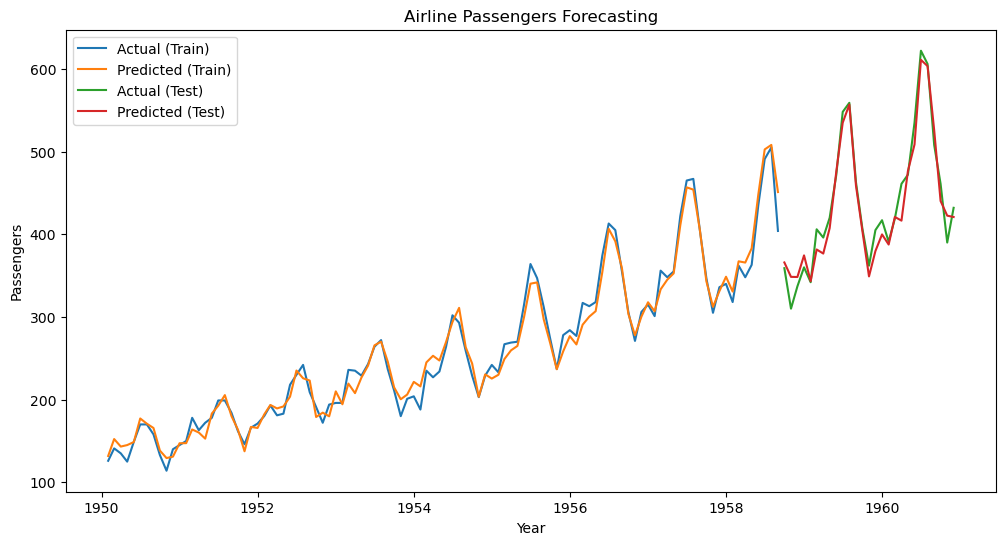

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, y_train, label='Actual (Train)')
plt.plot(train.index, train_pred, label='Predicted (Train)')
plt.plot(test.index, y_test, label='Actual (Test)')
plt.plot(test.index, test_pred, label='Predicted (Test)')
plt.title('Airline Passengers Forecasting')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()
plt.show()

**Step 9: Conclusion**

This tutorial covered the basics of time series analysis using a machine learning algorithm. Keep in mind that this is a simple example, and in real-world scenarios, more complex models and techniques might be required depending on the nature of the data. Additionally, hyperparameter tuning, feature selection, and other advanced techniques can be applied to improve the model's performance.

In [40]:
#plt.figure(figsize=(12, 6))
#plt.plot(test.index, y_test, label='Actual (Test)', marker='o')
#plt.plot(test.index, test_pred, label='Predicted (Test)', linestyle='dashed', marker='o')
#plt.title('Airline Passengers Forecasting')
#plt.xlabel('Year')
#plt.ylabel('Passengers')
#plt.legend()
#plt.show()


In [50]:
import shutil

folder_to_delete = 'aclImdb'

try:
    # Use shutil.rmtree to remove the folder and its contents recursively
    shutil.rmtree(folder_to_delete)
    print(f'Successfully deleted the folder: {folder_to_delete}')
except OSError as e:
    print(f'Error: {folder_to_delete} - {e.strerror}')


Successfully deleted the folder: aclImdb
